This notebook is work towards making a web scraper to sift through twitter data for positive and negative posts about Donald Trump and Hillary Clinton. The goal is to see how this compares with the projected votes and see if it matches up with the projected candidate having more positive votes both in quantity and percentage. My idea is to combine code from the twitter assignment last semester and the web scraper from this semester.

i will define a neutral post as one that mentions the candidate but does not contain a word from our word bank, or the postive and negatives in the post cancel each other out.


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from string import punctuation
import urllib.request
import string
import re

path='http://www.unc.edu/~ncaren/haphazard/'


def Classifier(tweet):
    
    '''This function will classify the tweet as either hillary or donald, and will return "false" if it is neither'''
    
    tweet= re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    tweet_processed= tweet
    exclude = set(string.punctuation)
    tweet_processed = ''.join(ch for ch in tweet_processed if ch not in exclude)
    tweet_processed = tweet_processed.lower()
    #print(tweet_processed)
    words=tweet_processed.split(' ')
    d=0 #donald counter
    c=0 #clinton counter
    for i in range (len(tweet_processed)):
        if tweet_processed[i:(i+7)] == 'hillary':
            c=1
        if tweet_processed[i:(i+6)] == 'donald':
            d=1
        if tweet_processed[i:(i+5)] == 'trump':
            d=1
        if tweet_processed[i:(i+7)] == 'clinton':
            c=1
    return (c,d)

def tweetcount(tweet, positive_words, negative_words):
    
    '''this is some lovely code from homework 5 in nsc 204 again, however i found some cleaner ways of doing it
    online and fixed it since it didnt seem to want to work here, however it worked in the other notebook...strange'''

    tweet_processed = tweet
    exclude = set(string.punctuation)
    tweet_processed = ''.join(ch for ch in tweet_processed if ch not in exclude)
    tweet_processed = tweet_processed.lower()
    words = tweet_processed.split(' ')
    pos = sum([word in positive_words for word in words])
    neg = sum([word in negative_words for word in words])
    answer = (pos, neg)
    return answer


def Counter(counts,tweet):
    
    '''this will count the posts that are positive or negative
        counts is a running count of the postive,negative, and neutral posts posts'''
    answer = tweetcount(tweet, positive_words, negative_words)
    positive = answer[0]
    negative = answer[1]
    difference = positive - negative
    
    if difference == 0:
        counts[2] += 1
    elif difference > 0:
        counts[0] += 1
    elif difference < 0:
        counts[1] += 1
    
    return (counts)
    
    # print ('i can count!!', 'and this is the answer!!', counts) -- This line will not run, it's after the return.




def wordbank (path):
    
    '''this function is to load up the word bank we used on homework 5 in NSC 204'''
    files=['negative.txt','positive.txt']
    for file_name in files:
        urllib.request.urlretrieve(path+file_name,file_name)
    pos_sent = open("positive.txt").read()
    positive_words=pos_sent.split('\n')
    neg_sent = open("negative.txt").read()
    negative_words=neg_sent.split('\n')
    #print ('wordbank is loaded')
    return (positive_words,negative_words)
    


def results(H_counts,D_counts):
    '''this i plan to make a graph of showing the results in the end'''
    labels = ('Donald', 'Hillary', 'Neutral')
    sizes = ((H_counts[1] +D_counts[0]),(H_counts[0]+D_counts[1]),(H_counts[2]+D_counts[2]))
    colors = ('blue', 'red', 'grey')
    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    #print ('i am a graph')


def run(tweets,positive_words,negative_words):
    '''duration will be the number of posts that we are interested in that we want to count'''
    H_counts= [0,0,0]
    D_counts= [0,0,0]
    for tweet in tweets:
        (hillary,donald) = Classifier (tweet)
        #if candidate == False:
        #    continue
        if hillary == 1:
            H_counts= Counter(H_counts,tweet)
        if donald == 1:
            D_counts= Counter(D_counts,tweet)
    
    
    results(H_counts,D_counts)
    return (H_counts,D_counts)

    
    
(positive_words,negative_words) = wordbank (path) #this is to load up the positive words bank

([11, 7, 18], [13, 7, 7])

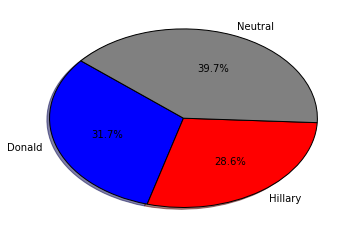

In [31]:
'''This cell loops through the 538 data, using data from Friday Nov. 4th '''

tweets538 = open('FiveThirtyEight.txt').read()
tweets538 = tweets538.split('\n')

run(tweets538,positive_words,negative_words)


([11, 12, 31], [10, 9, 9])

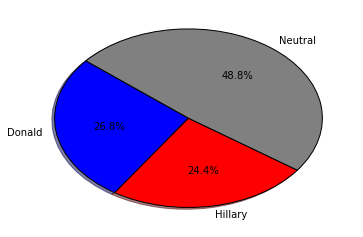

In [32]:
'''This cell loops through the 538 data, using data from Monday, Nov 7th '''

tweets538 = open('FiveThirtyEight_tweets-monday.txt').read()
tweets538 = tweets538.split('\n')

run(tweets538,positive_words,negative_words)

([41, 8, 38], [11, 5, 17])

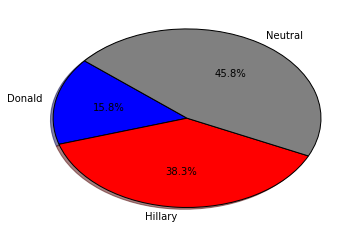

In [33]:
'''running Hillarys tweets based on 11/7/16 sorted by tweets about herself or the Donald'''
tweetsh = open('Hillary.txt').read()
tweetsh = tweetsh.split('\n')
run(tweetsh,positive_words,negative_words)

([16, 19, 23], [12, 5, 14])

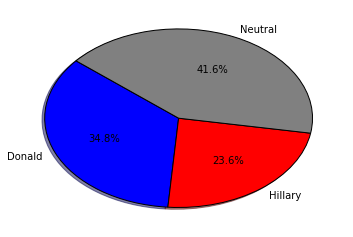

In [35]:
'''running the Donalds tweets based on 11/7 using keywords about himself or Hillary'''
tweetsd = open('Donald.txt').read()
tweetsd = tweetsd.split('\n')
run(tweetsd,positive_words,negative_words)

[96, 23, 170]
[88, 35, 223]


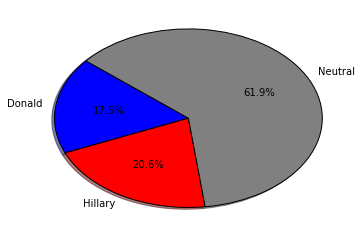

In [36]:
'''Hillary.txt the twitter data from the real donald trump on 11/4'''
tweetsh = open('Hillary.txt').read()
tweetsh = tweetsh.split('\n')
#print (tweets[:1])
H_counts= [0,0,0]
for i in range (len(tweetsh)):
    tweet=tweetsh[i]
    tweet= re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    H_counts= Counter(H_counts,tweet)
print (H_counts)


'''Donald.txt the twitter data from the real donald trump on 11/4'''
tweetsd = open('Donald.txt').read()
tweetsd = tweetsd.split('\n')
#print (tweets[:1])
D_counts= [0,0,0]
for i in range (len(tweetsd)):
    tweet=tweetsd[i]
    tweet= re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    D_counts= Counter(D_counts,tweet)
print (D_counts)
results(H_counts,D_counts)

[83, 40, 89]


([<matplotlib.patches.Wedge at 0x7f0f810ce6a0>,
  <matplotlib.text.Text at 0x7f0f811ae780>])

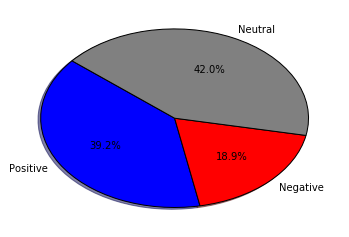

In [37]:
tweetsd = open('Bernie.txt').read()
tweetsd = tweetsd.split('\n')
#print (tweets[:1])
B_counts= [0,0,0]
for i in range (len(tweetsd)):
    tweet=tweetsd[i]
    tweet= re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    B_counts= Counter(B_counts,tweet)
print (B_counts)
labels = ('Positive', 'Negative', 'Neutral')
sizes = (B_counts)
colors = ('blue', 'red', 'grey')
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

[83, 45, 107]
[87, 46, 121]


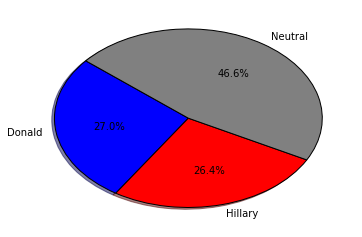

In [38]:
'''This is my testing Cell, all i need to do now is make this into loops and figure out a scraper'''


'''Hillarytest.txt is a copy of the twitter posts from the Hillary section on the HW5 in NSC 204'''
tweetsh = open('Hillarytest.txt').read()
tweetsh = tweetsh.split('\n')
#print (tweets[:1])
H_counts= [0,0,0]
for i in range (len(tweetsh)):
    tweet=tweetsh[i]
    tweet= re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    H_counts= Counter(H_counts,tweet)
print (H_counts)


'''Donaldtest.txt is a copy of the twitter posts from the Hillary section on the HW5 in NSC 204'''
tweetsd = open('Donaldtest.txt').read()
tweetsd = tweetsd.split('\n')
#print (tweets[:1])
D_counts= [0,0,0]
for i in range (len(tweetsd)):
    tweet=tweetsd[i]
    tweet= re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    D_counts= Counter(D_counts,tweet)
print (D_counts)
results(H_counts,D_counts)
#run_time(url,duration,positive_words,negative_words)
# labels = ('Donald', 'Hillary', 'Neutral')
# sizes = (D_counts[0],H_counts[0],(H_counts[2]+D_counts[2]))
# colors = ('blue', 'red', 'grey')

 
# # Plot
# plt.pie(sizes, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=140)
